In [45]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud
okt = Okt()
import konlpy
import os
import copy
import re
import nltk

mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트

In [3]:
cd ~/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)/

/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)


In [6]:
ls

건강기능식품.csv            제주채소류재배현황.csv
업종별성별카드이용정보.csv  홀푸드코리아.csv


In [7]:
df = pd.read_csv('홀푸드코리아.csv')

In [10]:
 df.제품명.value_counts()

홀리브        126
홀핏         123
제주스 양배추    114
홀푸드코리아      12
Name: 제품명, dtype: int64

In [17]:
df[df.제품명=='제주스 양배추'].본문내용

261    \n​​​​제주스 양배추브로콜리즙은 깨끗한 섬 제주에서 재배부터 가공까지 책임지는믿...
262    \n요즘은 학교급식이 당연하게 생각되지만, 10년전만 해도 도시락을 싸가지고 다녔던...
263    \n즐겨드시는 건강음료 있으세요?밈미가 그린푸드 음료 하나 소개해드리려고요~🙋🏻​​...
264    \n​\n\n​\n\n🧃 유기농 양배추즙 🧃제주스 유기농양배추즙 챙겨 마시기​#유기...
265    \n홈쇼핑에서 엄청난 판매 신화를 낸 건강즙으로 유명한 제주스의  유기농 양배추즙 ...
                             ...                        
370    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
371    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
372    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
373    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
374    하이염 이쁜애기공주예요 요즘 일교차도 심하고 미세먼지도 걱정되서건강관리를 위해서 #...
Name: 본문내용, Length: 114, dtype: object

In [26]:
df_양배추즙 = copy.deepcopy(df[df.제품명=='제주스 양배추'])

In [28]:
df_양배추즙.reset_index(inplace=True,drop=True)

In [30]:
df_양배추즙.head(1)

,제목,날짜,내용,href,제품명,본문내용
0,양배추브로콜리즙 제주스 양배추즙 깨끗한 섬 제주에서~,2021.02.26,또 제주스 양배추브로콜리즙은 개그맨 염경환씨가 모델을 하고있어요!!! 양배추만 들어...,https://blog.naver.com/qkrd137/222257410502,제주스 양배추,\n​​​​제주스 양배추브로콜리즙은 깨끗한 섬 제주에서 재배부터 가공까지 책임지는믿...


In [31]:
new_tokens =[]
for i in range(len(df_양배추즙.본문내용)):
    new_token = re.sub('[^가-힣 ]', '', str(df_양배추즙.본문내용[i]))
    new_tokens.append(new_token)

In [32]:
len(new_tokens)

114

In [34]:
new_tokenss = okt.nouns(str(new_tokens))

In [35]:
len(new_tokenss)

24763

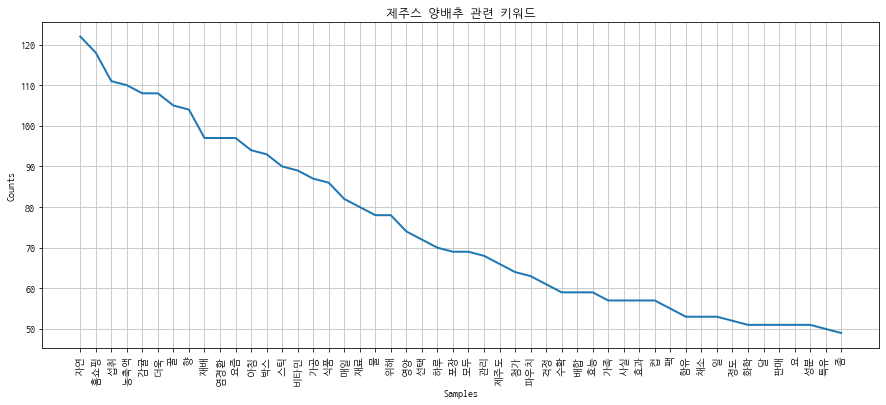

<Figure size 432x288 with 0 Axes>

In [90]:
yang = nltk.Text(new_tokensss, name='제주스 양배추')
plt.figure(figsize=(15,6))
plt.title('제주스 양배추 관련 키워드')
yang.plot(50)
plt.show()
plt.savefig('제주스 양배추 관련키워드.png',dpi=300)

In [91]:
pwd

'/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)'

In [77]:
stop_words = '양배추 브로콜리 즙 콜라겐 제품 수 추천 더 저 분 느낌 포 제주 안 회 하나 때문 음식 제 쥬스 것 때 몸 해 주스 유기농 건강 정말 마시기 거 생각 먹기 당근 주산 사용 원료 진액 맛 위'
stop_list = stop_words.split()
new_tokensss = [token for token in new_tokenss if token not in stop_list]

In [79]:
data = yang.vocab().most_common(300)
data[:50]

[('자연', 122),
 ('홈쇼핑', 118),
 ('섭취', 111),
 ('농축액', 110),
 ('감귤', 108),
 ('더욱', 108),
 ('꿀', 105),
 ('향', 104),
 ('재배', 97),
 ('염경환', 97),
 ('요즘', 97),
 ('아침', 94),
 ('박스', 93),
 ('스틱', 90),
 ('비타민', 89),
 ('가공', 87),
 ('식품', 86),
 ('매일', 82),
 ('재료', 80),
 ('물', 78),
 ('위해', 78),
 ('영양', 74),
 ('선택', 72),
 ('하루', 70),
 ('포장', 69),
 ('모두', 69),
 ('관리', 68),
 ('제주도', 66),
 ('첨가', 64),
 ('파우치', 63),
 ('걱정', 61),
 ('수확', 59),
 ('배합', 59),
 ('효능', 59),
 ('가족', 57),
 ('사실', 57),
 ('효과', 57),
 ('컵', 57),
 ('팩', 55),
 ('함유', 53),
 ('채소', 53),
 ('일', 53),
 ('정도', 52),
 ('화학', 51),
 ('달', 51),
 ('판매', 51),
 ('요', 51),
 ('성분', 51),
 ('특유', 50),
 ('좀', 49)]

In [80]:
wc = WordCloud(
    width=1920, height=1080,
    # font_path='c:/Windows/Fonts/malgun.ttf', # 윈도우
    font_path='NanumGothicCoding', # 리눅스
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

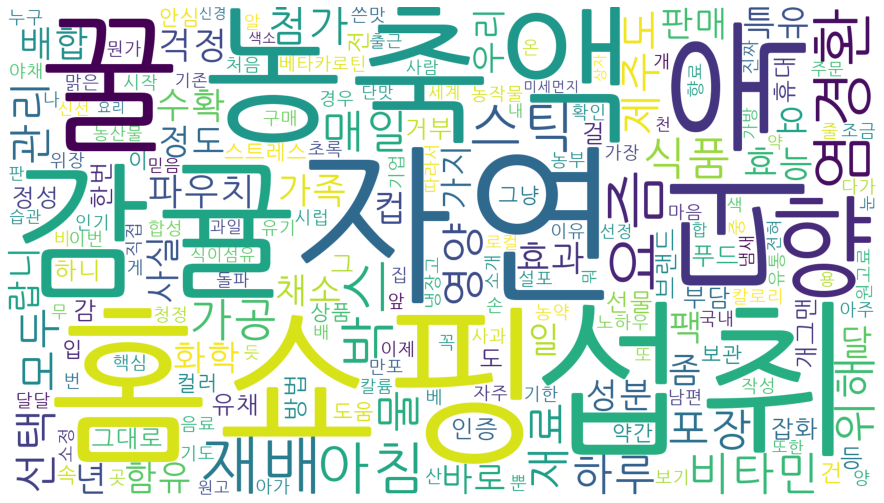

In [81]:
plt.figure(figsize=(16,9))
plt.imshow(wc)
plt.axis('off')
plt.show()